In [11]:
# Import required libraries 
import keras #library for neural network
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize


In [2]:
# Library settings
pd.set_option('display.max_columns', 60)

# **A. Opis zbiorów danych.**

**Covertype Data Set**

Typ atrybutów: Kategoryczny, Integer. <br>
Liczba atrybutów: 54 <br>
Zgubione wartości: 0 <br>
Rodzaj danych: Dyskretne <br>

Zbiór danych służy do przewidywania typu pokrycia leśnego na podstawie następujących atrybutów:
*   Wysokość
*   Wygląd/Aspekt
*   Nachylenie
*   Pozioma odległość od wody
*   Pionowa odległość od wody
*   Pozioma odległość od jezdni
*   Zacienienie o 9:00
*   Zacienienie o 12:00
*   Zacienienie o 15:00
*   Pozioma odległość do punktów zapłonu
*   Dziekie tereny (4 binarne kolumny)
*   Typy ziemii (40 binarnych kolumn)
*   7 typów pokrycia leśnego

Dane są w postaci surowej, nie były skalowane.
Wszystkie dane zostały uzyskane od instytucji znajdujących się w USA i dotyczą czterech obszarów dzikiej przyrody znajdujących się w Roosevelt National Forest w północnym Kolorado. Obszary te zostały wybrane ze względu na to, że nie znajdziemy tam dużej ingerencji człowieka, zatem wygląd tych terenów i typy pokrycia leśnego są wynikiem przemian naturalnych.

Najlepsze i najbardziej typowe dla całego zbiory danych są obszary Rawah oraz Comanche Peak, ponieważ posiadają wiele gatunków drzew i lepszy zakres wartości zmiennych predykcyjnych takich jak np. wyokość. Skłąd gatunkowy pozostałych dwóch obszarów jest nieco bardziej ubogi.

<br>
<br>

**Credit Approval Data Set**

Typ atrybutów: Kategoryczny, Continuous, Integer. <br>
Liczba atrybutów: 15 <br>
Liczba instancji: 690 <br>
Zgubione wartości: występują <br>
Rodzaj danych: Mieszane <br>

Zbiór danych służy do rozpatrywania wniosków o karty kredytowe na podstawie następujących atrybutów:

* A1: b, a. 
* A2: continuous. 
* A3: continuous. 
* A4: u, y, l, t. 
* A5: g, p, gg. 
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
* A7: v, h, bb, j, n, z, dd, ff, o. 
* A8: continuous. 
* A9: t, f. 
* A10: t, f. 
* A11: continuous. 
* A12: t, f. 
* A13: g, p, s. 
* A14: continuous. 
* A15: continuous. 
* A16: +,- (class attribute)

Nazwy i wartości wszystkich atrybutów zostały zmienione na nic nieznaczące symbole w celu ochrony poufności danych. W zbiorze danych znajdują się atrybuty kategoryczne, ciągłe oraz typu całkowitego o dużych i małych wartościach. Zbiór danych powstał w calach klasyfikacyjnych i posiada 15 atrybutów z 690 instancjami w którym występują brakujące dane.


# **Wczytywanie zbiorów danych**

In [3]:
#  Load dataset 1
print("Dataset 1 - forest covertype:\n")
covtype_colnames = ['Elevation', 'Aspect', 'Slope', 'Dist_to_water_hor', 'Dist_to_water_ver', 'Hillshade_9am', 'Hillshade_Noon',
                    'Hillshade_3pm', 'Dist_to_fire', ] + [f'Wilderness_{i}' for i in range(4)] + [f'Soil_{i}' for i in range(40)] + ['Cover_Type']
covtype_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz",
                              compression='gzip', header=None, names=covtype_colnames)
covtype_dataset.head()

Dataset 1 - forest covertype:



,Elevation,Aspect,Slope,Dist_to_water_hor,Dist_to_water_ver,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Dist_to_fire,Wilderness_0,Wilderness_1,Wilderness_2,Wilderness_3,Soil_0,Soil_1,Soil_2,Soil_3,Soil_4,Soil_5,Soil_6,Soil_7,Soil_8,Soil_9,Soil_10,Soil_11,Soil_12,Soil_13,Soil_14,Soil_15,Soil_16,Soil_17,Soil_18,Soil_19,Soil_20,Soil_21,Soil_22,Soil_23,Soil_24,Soil_25,Soil_26,Soil_27,Soil_28,Soil_29,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
#  Load dataset 2
credit_colnames = [f'A_{i}' for i in range(1,17)]
credit_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",header=None, names=credit_colnames)
print("Dataset 2 - credit screening:\n")
credit_dataset.head()

Dataset 2 - credit screening:



,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,A_15,A_16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# **Wizualizacja danych**

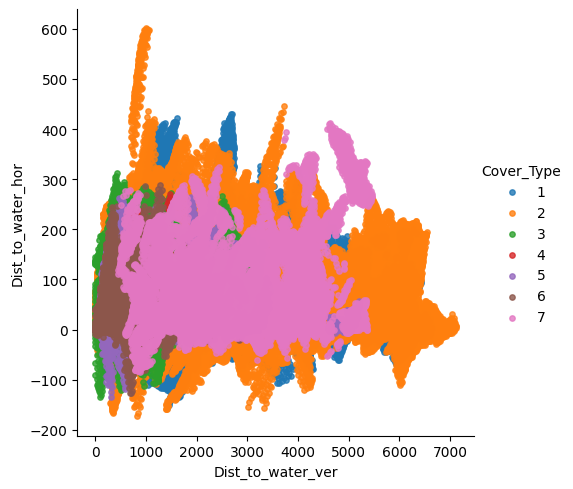

In [9]:
sns.lmplot(x='Dist_to_water_ver', 
           y='Dist_to_water_hor',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


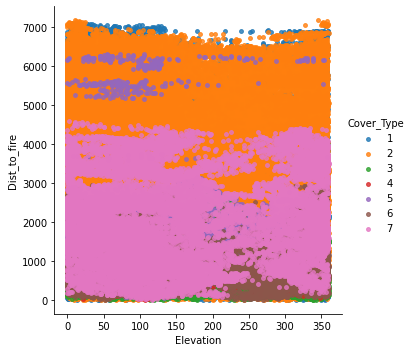

In [ ]:
sns.lmplot('Elevation', 'Dist_to_fire',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


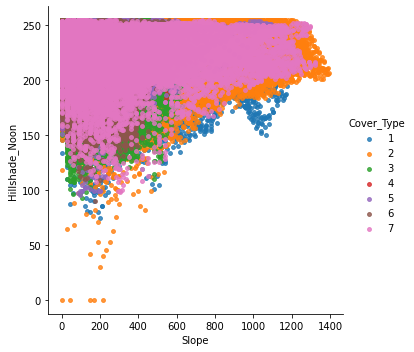

In [ ]:
sns.lmplot('Slope', 'Hillshade_Noon',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

In [ ]:
A = ['A_3', 'A_8', 'A_11', 'A_15']
for i in range(len(A)):
    for j in range(len(A)):
        if i >= j:
            pass
        else:
            sns.lmplot(A[i], A[j],
                    data=credit_dataset,
                    fit_reg=False,
                    hue="A_16",
                    scatter_kws={"marker": "D",
                                    "s": 50})

In [16]:
# replace 7 with 0 to transform covtypes from 1-7 to 0-6
covtype_dataset.loc[covtype_dataset["Cover_Type"] == 7, "Cover_Type"] = 0

# split into data and labels
X = covtype_dataset.iloc[:, 0:-1].values
y = covtype_dataset.iloc[:, -1].values
X = normalize(X, axis=0)

# split into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)

# transform labels to OHE
y_train = np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)

# create NN
model = Sequential()
model.add(Dense(1000, input_dim=53, activation='relu'))  # the input layer
model.add(Dense(50, activation='relu'))  # the first hidden layer
model.add(Dropout(0.2))  # Protects against overfitting
model.add(Dense(7, activation='softmax'))  # the output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # compile model

# train NN
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=20, epochs=10, verbose=1)

# predict values from test set, measure accuracity
prediction = model.predict(X_test)
length = len(prediction)
y_label = np.argmax(y_test, axis=1)
predict_label = np.argmax(prediction, axis=1)
# how times it matched/ how many test cases
accuracy = np.sum(y_label == predict_label)/length * 100
print("Accuracy of the neural network:", accuracy)


Epoch 1/10
23241/23241 [==============================] - 41s 2ms/step - loss: 0.8322 - accuracy: 0.6206 - val_loss: 0.7754 - val_accuracy: 0.6467
Epoch 2/10
23241/23241 [==============================] - 42s 2ms/step - loss: 0.7780 - accuracy: 0.6441 - val_loss: 0.7563 - val_accuracy: 0.6532
Epoch 3/10
23241/23241 [==============================] - 42s 2ms/step - loss: 0.7620 - accuracy: 0.6503 - val_loss: 0.7397 - val_accuracy: 0.6560
Epoch 4/10
23241/23241 [==============================] - 43s 2ms/step - loss: 0.7516 - accuracy: 0.6526 - val_loss: 0.7418 - val_accuracy: 0.6491
Epoch 5/10
23241/23241 [==============================] - 43s 2ms/step - loss: 0.7440 - accuracy: 0.6566 - val_loss: 0.7245 - val_accuracy: 0.6615
Epoch 6/10
23241/23241 [==============================] - 42s 2ms/step - loss: 0.7351 - accuracy: 0.6601 - val_loss: 0.7179 - val_accuracy: 0.6690
Epoch 7/10
23241/23241 [==============================] - 45s 2ms/step - loss: 0.7275 - accuracy: 0.6633 - val_loss: 0